![Avatar foto de Flávio Coutinho](https://fegemo.github.io/cefet-front-end/images/flavio-avatar.jpg)
# TP2 - Boosting com o CoutoBoost


<dl style="margin-top: 1.5em">
    <dt>Aluno</dt><dd>Flávio Coutinho</dd>
    <dt>Turma</dt><dd>Aprendizado de Máquina, UFMG, 01/21</dd>
    <dt>Objetivo</dt><dd>Implementar um processo de <em>boosting</em> para o problema de classificar o resultado de jogos da velha.</dd>
    <dt>Link</dt><dd><a href="https://fegemo.github.io/ml-boosting/" target="_blank">https://fegemo.github.io/ml-boosting/</a>
</dl>

Conteúdo deste _notebook_:
- [Descrição dos dados](#Descrição-dos-dados)
- [Implementação](#Implementação)
- [Experimentos](#Experimentos)
    - [Preparação dos dados](#Preparação-dos-dados)
    - [Baseline: AdaBoost](#Baseline:-AdaBoost)
    - [CoutoBoost](#CoutoBoost)
- [Análises](#Análises)
    - [Análise Cruzada](#Análise-Cruzada)
    - [Processo de Boosting](#Processo-de-Boosting)


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,5)})

In [2]:
"""
Define uma folha de estilos pro notebook
"""
from IPython.core.display import HTML
def css_styling():
    styles = "<style>" + open("./estilos.css", "r").read() + "</style>"
    return HTML(styles)
css_styling()

Este _notebook_ é a implementação do trabalho prático da disciplina de [Aprendizado de Máquina](https://homepages.dcc.ufmg.br/~adrianov/ml/) cursada na UFMG em 2021/1 ministrada pelo [prof. Adriano Veloso](https://dcc.ufmg.br/~adrianov).

O trabalho contempla o conteúdo de _Boosting_ e envolve a implementação desse processo para o problema de **classificar o resultado de partidas de jogo da velha** dada uma situação de tabuleiro.

## Descrição dos dados

O arquivo `tic-tac-toe.data` descreve configurações de tabuleiro do jogo da velha com rótulos referentes ao resultado sob a perspectiva do jogador `x`. Por exemplo:

In [3]:
df_original = pd.read_csv("tic-tac-toe.data", names=[0, 1, 2, 3, 4, 5, 6, 7, 8, "Result"])
df_original.head()

,0,1,2,3,4,5,6,7,8,Result
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


São **958 configurações de tabuleiro** rotuladas em `"positive"`, se o jogador `x` ganhou a partida, ou `"negative"`, se perdeu.

As características são 9, uma para cada posição do tabuleiro, podendo assumir os valores `x`, `o` ou `b` - neste caso, a célula não foi preenchida.

In [4]:
print("Exemplos x características: ", (df_original.shape[0], df_original.shape[1]-1))
positive_ratio = len(df_original.loc[df_original["Result"] == "positive"]) / df_original.shape[0]
negative_ratio = 1 - positive_ratio
print(f"Taxa de positivos: {positive_ratio:.2f}")
print(f"Taxa de negativos: {negative_ratio:.2f}")

Exemplos x características:  (958, 9)
Taxa de positivos: 0.65
Taxa de negativos: 0.35


Como pode ser observado, **o conjunto de dados <u>não</u> está balanceado** visto que quantidade de exemplos rotulados `"positive"` representa 65% da entrada. Sendo assim, é importante analisar a classificação não apenas com erro e acurácia, mas **também olhar para precisão e revocação** e outras medidas mais apropriadas a essa situação.

## Implementação

Foi implementado um algoritmo similar ao AdaBoost, porém seguindo algumas restrições:
- Entrada binária
- Rótulos esperados e saída em duas classes $\in {-1, +1}$
- Modelos fracos como _stumps_ de decisão

O algoritmo foi registrado em cartório como CoutoBoost e ele foi implementado seguindo a interface de estimadores do sklearn de forma a viabilizar a interoperabilidade de outros recursos do pacote sklearn com ele, como validação cruzada, métricas de desempenho etc.

O código foi escrito no módulo [`couto_boost.py`](couto_boost.py) e seus trechos mais relevantes estão descritos a seguir. Primeiramente, uma descrição em alto nível dos métodos de criação da instância de classificador:

```python
class CoutoBoostClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, iterations=108):
        self.iterations = iterations # qtde de iterações
        
    
    # métodos PRIVADOS
    def _create_stumps(self, X):
        # gera e retorna lista com todas as possibildidade de stump
    
```

O parâmetro `iterations` define a quantidade de iterações do _Boosting_ e é o único hiperparâmetro disponível.

A seguir, estão os métodos referentes ao treinamento do classificador:

```python
class CoutoBoostClassifier(BaseEstimator, ClassifierMixin):

    def fit(self, X, y):
        # 1. cria os stumps que podem ser usados (de acordo com iterations)
        # 2. inicializa pesos dos exemplos
        # 3. repete pelo número de iterations:
        # 3.1. seleciona melhor stump: self._pick_best_stump(...)
        # 3.2. calcula importância dele e seu erro, atualizando pesos: self._update_weights(...)
        # 3.3. se erro chegou a zero, sai antes de concluir o loop
        
    # métodos PRIVADOS
    def _pick_best_stump(self, X, y):
        # 1. percorre stumps e pega o que menos errou
        # percorre os exemplos verificando se este stump errou cada um
        # se stump errou este exemplo, soma seu peso ao erro do stump
        # e coloca o exemplo na lista mistaken_sample_ids
        # se o stump tiver sido melhor que os anteriores, guarda ele
        # retorna o melhor stump, seu erro e lista de exemplos errados
    
    def _update_weights(self, error, mistaken_sample_ids):
        # 1. encontra valor de alpha dado o error
        # 2. acha novos pesos desta iteração (sem normalizar ainda)
        # 3. normaliza os pesos
        return
        
```

Além desses métodos, a classe `CoutoBoostClassifier` do módulo [`couto_boost.py`](couto_boost.py) também possui métodos para classificação:



```python
class CoutoBoostClassifier(BaseEstimator, ClassifierMixin):
    
    def decision_function(self, X, iterations_to_consider=None):
        # 1. invoca todos os stumps
        # 2. multiplica o resultado de cada um pelo alfa
        # 3. soma tudo e retorna um número (não necessariamente -1, 1)
        
    def predict(self, X, iterations_to_consider=None):
        # 1. delega para self.decision_function
        # 2. se > 0, retorna +1. Senão, -1
        
    def predict_proba(self, X):
        # 1. delega para self.decision_function
        # 2. retorna softmax desse resultado
        
```

O método `predict_proba(X)` é necessário para utilizarmos a validação cruzada do `sklearn`.

## Experimentos

Após a implementação, os dados foram preparados para a condução de experimentos. Foi usada a implementação `AdaBoostClassifier` do pacote `sklearn` como _baseline_. Neste passo, apenas testes simples foram feitos com o AdaBoost e o CoutoBoost, que foram medidos quanto a sua acurácia/erro. Outras análises foram feitas na seção seguinte.

Nesta etapa de experimentos iniciais, o conjunto de dados foi dividido estaticamente entre `X_train` e `X_test` (80/20%). Apenas nas próximas análises é que foi realizada a validação cruzada.

### Preparação dos dados

O algoritmo `CoutoBoostClassifier` implementado é uma versão simplificada do AdaBoost que espera receber as entradas com características binárias e a saída $\in \{-1, +1\}$.



In [5]:
from sklearn.model_selection import train_test_split


# 1. muda a ordem das colunas colocando o label primeiro (para próximo passo)
cols = df_original.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df_original[cols]


# 2. valor numérico para rótulo
df["Result"] = df["Result"].map({
    "positive":  1,
    "negative": -1
})

# 3. transforma cada coluna de feature em 3 colunas binárias
df = pd.get_dummies(df, columns=[0, 1, 2, 3, 4, 5, 6, 7, 8])

# 4. embaralha
df = df.sample(frac=1)

# 5. DataFrame >> ndarray
# 6. X, y
dados = df.to_numpy()
y = dados[:, 0]
X = dados[:, 1:]

# 7. particiona em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


### Baseline: AdaBoost

Para fins de comparação, vamos resolver o problema usando a implementação de AdaBoost do pacote `sklearn.ensemble`.

In [6]:
# configuração do experimento inicial
iterations = 350


**Treinamento** do AdaBoost:

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf_baseline = AdaBoostClassifier(n_estimators=iterations)
clf_baseline.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=350)

**Teste** do AdaBoost:

In [8]:
y_hat_baseline = clf_baseline.predict(X_test)

score_baseline = accuracy_score(y_test, y_hat_baseline)
print(f"Acurácia de AdaBoost({iterations}):", score_baseline)

Acurácia de AdaBoost(350): 0.96875


### CoutoBoost

Similar aos algoritmos do pacote `sklearn`, o `CoutoBoostClassifier` tem em sua interface pública os métodos `fit(X, y)` e `predict(X)`, sendo que este último pode receber um parâmetro `iterations` que indica a quantidade de iterações que selecionarão uma hipótese, das que foram treinadas, que serão usadas para a classificação. Se omitido, todas as hipóteses serão usadas uma vez.

**Treinamento** do CoutoBoost:

In [9]:
from couto_boost import CoutoBoostClassifier

clf = CoutoBoostClassifier(iterations=iterations)
clf.fit(X_train, y_train)

CoutoBoostClassifier(iterations=350)

**Teste inicial** do CoutoBoost:

In [10]:
y_hat = clf_baseline.predict(X_test)

score = accuracy_score(y_test, y_hat)
print(f"Acurácia de CoutoBoost({iterations}):", score)

Acurácia de CoutoBoost(350): 0.96875


Com o classificador **CoutoBoost** implementado, vamos ver como sua acurácia se comporta de acordo com o número de iterações:

Text(0.5, 1.0, 'Matriz de confusão na iteração 350')

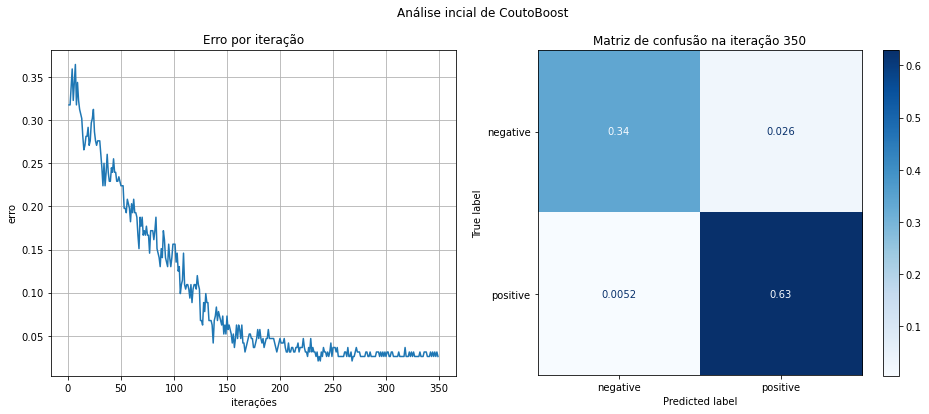

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import zero_one_loss
from sklearn.metrics import plot_confusion_matrix

accuracies = []
errors = []

for max_iterations in np.arange(1, iterations):
    y_hat = clf.predict(X_test, iterations_to_consider=max_iterations)
    score = accuracy_score(y_test, y_hat)
    error = zero_one_loss(y_test, y_hat)
    accuracies.append(score)
    errors.append(error)

# mostra o erro ao longo das iterações
plt.rcParams.update({'figure.figsize':(16,6)})
fig, [axL, axR] = plt.subplots(1, 2)
fig.suptitle(f"Análise incial de CoutoBoost")
axL.plot(np.arange(1, iterations), errors)
axL.set(xlabel='iterações', ylabel='erro',
       title='Erro por iteração')
axL.grid()

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=["negative", "positive"], normalize="all", ax=axR)
axR.set_title(f"Matriz de confusão na iteração {iterations}")



A evolução do **erro ao longo das iterações** do CoutoBoost (figura à esquerda) mostrou que a redução do erro possui oscilação local, mas que é sustentada, não sofrendo de _underfitting_, nem de _overfitting_, mesmo sem a utilização de regularizador.

Esse é o comportamento esperado para as técnicas de _ensemble_, visto que ao empregar diversos modelos fracos - neste caso, _decision stumps_, a capacidade de cada modelo isoladamente é muito baixa, reduzindo a chance de sobreajuste. Por outro lado, como vários desses modelos fracos são usados, o processo de _boosting_ tampouco sofre de subajuste, dada uma quantidade suficiente de modelos fracos.

No caso do CoutoBoost/AdaBoost, a técnica de _ensemble_ é o _boosting_ aditivo, que emprega uma combinação linear desses modelos fracos considerando que a "opinião" da maioria deles converge para um modelo forte. Neste problema foi, de fato, possível observar esse comportamento.

Já a **análise da matriz de confusão** (figura à direita) é interessante em situações de conjunto de dados desbalanceado. No caso deste problema, ela possibilitou verificar alta precisão e alta revocação, visto que as taxas de falsos negativos e falsos positivos foram zero ou próximas dele.

## Análises

Além dos experimentos iniciais que verificaram que o CoutoBoost converge e atinge erros tão baixos quando a implementação _baseline_ do AdaBoost, também foram conduzidas uma **avaliação cruzada** e **outra específica do processo de _boosting_**, realçando os valores internos do algoritmo como a evolução dos erros e a importância dos _stumps_, bem como as características dos _stumps_ escolhidos em cada iteração.

### Análise Cruzada

Como a análise cruzada faz sua própria divisão entre conjunto de treinamento e teste, a divisão anterior foi desfeita, resultado em variáveis `X` e `y` contemplando todo o conjunto rotulado.

In [12]:
X = np.append(X_train, X_test, axis=0)
y = np.append(y_train, y_test, axis=0)

A seguir, a função recebe um classificar e o conjunto de dados e rótulos, faz _5-fold cross validation_ e plota tanto um gráfico ROC-AUC quanto uma curva precisão-revocação.

In [13]:
from sklearn.metrics import auc, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold

def analyze_and_plot_estimator(estimator, estimator_name, X, y):
    """
    Faz (1) validação cruzada, gerando gráfico de curva AOC-ROC e (2) testando nos dados de teste para gerar curva precision-recall
    """
    # 1. curva ROC
    cross_validator = StratifiedKFold(n_splits=5)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f"Análise da validação cruzada de {estimator_name}")
    for i, (train, test) in enumerate(cross_validator.split(X, y)):
        estimator.fit(X[train], y[train])
        vizualization = plot_roc_curve(estimator, X[test], y[test], name=f"ROC do fold {i}", alpha=0.3, lw=1, ax=ax1)
        interp_tpr = np.interp(mean_fpr, vizualization.fpr, vizualization.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(vizualization.roc_auc)

    ax1.plot([0, 1], [0, 1], linestyle="--", lw=1, color="r", label="Acaso", alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    ax1.plot(mean_fpr, mean_tpr, color="b", label=r"ROC média (AUC = %0.4f $\pm$ %0.4f)" % (mean_auc, std_auc), lw=1, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax1.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=.2,
                    label=r"$\pm$ 1 desvio padrão")
    ax1.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=f"Curva ROC")
    ax1.set_ylabel("Taxa de verdadeiros positivos")
    ax1.set_xlabel("Taxa de falsos positivos")
    ax1.legend(loc="lower right")
    for axis in ["top", "bottom", "left", "right"]:
        ax1.spines[axis].set_linewidth(1)
    ax1.tick_params(width=1)
    
    
    # 2. Precisão e revocação em train/test
    visualization = plot_precision_recall_curve(estimator, X, y, ax=ax2, lw=1)
    visualization.ax_.set_title(f"Curva precisão-revocação")

    for axis in ["top", "bottom", "left", "right"]:
        ax2.spines[axis].set_linewidth(1)
    ax2.tick_params(width=1)
    
    
    fig.tight_layout()
    plt.show()
    return dict(mean_fpr=mean_fpr, mean_tpr=mean_tpr, label=r"ROC média (AUC = %0.4f $\pm$ %0.4f) %s" % (mean_auc, std_auc, estimator_name))

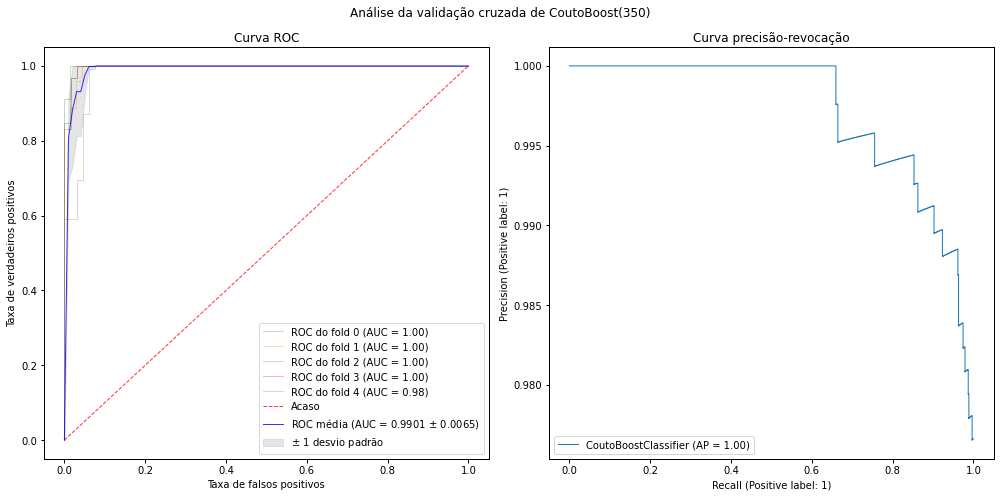

In [14]:
plt.rcParams.update({'figure.figsize':(14,7)})
roc = analyze_and_plot_estimator(clf, f"CoutoBoost({iterations})", X, y)


O **gráfico das curvas ROC** (à esquerda) mostra que a área sob as curvas é bem grande, aproximando 1 em todos os _folds_. Além disso, o desvio padrão desse valor ficou em $0.0032$, bem baixo, indicando um bom grau de certeza quanto ao bom resultado da relação entre verdadeiros e falsos positivos.

A **curva precisão-revocação** (à direita) também apresenta uma grande área sob ela, indicando um bom balanceamento entre precisão e revocação. Isso quer dizer que aumentos da precisão não atrapalham a revocação, nem vice-versa. Outro indicativo positivo é a precisão média, cujo valor foi $1.00$.

### Processo de Boosting

Também foram avaliados aspectos internos do processo de _boosting_ como a evolução erros e a importância dos _stumps_, bem como o uso de _stumps_ e as características da entrada a que se referem.

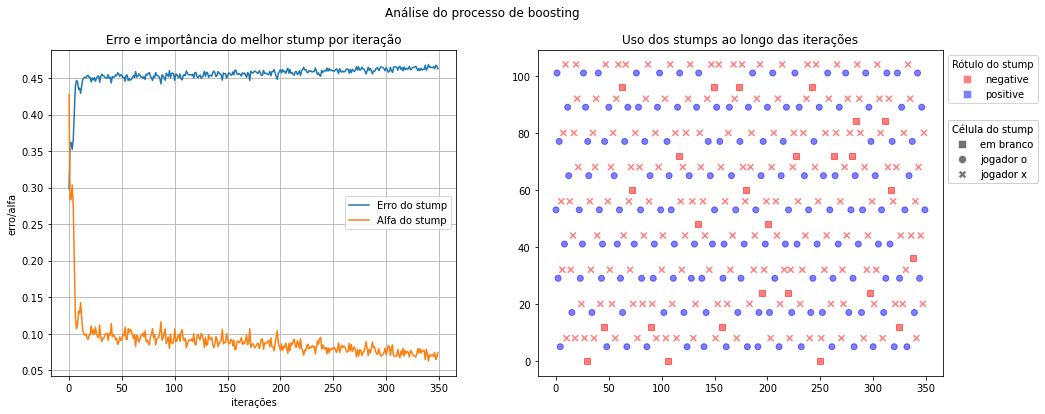

In [15]:
from matplotlib.lines import Line2D


# mostra o erro e importância do stump escolhido em cada iteração
plt.rcParams.update({'figure.figsize':(16,6)})
fig, [axL, axR] = plt.subplots(1, 2)
fig.suptitle(f"Análise do processo de boosting")
axL.plot(np.arange(0, iterations), clf.iteration_errors, label="Erro do stump")
axL.plot(np.arange(0, iterations), clf.iteration_alphas, label="Alfa do stump")
axL.set(xlabel='iterações', ylabel='erro/alfa',
       title='Erro e importância do melhor stump por iteração')
axL.legend()
axL.grid()

# stumps, iterations
max_stumps_or_iterations = np.maximum(clf.n_estimators, clf.iterations)
pad_width = max_stumps_or_iterations - clf.iterations


unit_x = np.arange(0, max_stumps_or_iterations)   # iterações
unit_y = np.pad(clf.iteration_stumps, (0, np.minimum(max_stumps_or_iterations - clf.iterations, clf.n_estimators)),
                mode="constant", constant_values=-1)
unit_y = np.ma.masked_equal(unit_y, -1)
axR.set_title("Uso dos stumps ao longo das iterações")

stump_per_iteration = np.ndarray((len(clf.iteration_stumps), 3))
for i, idx in enumerate(clf.iteration_stumps):
    stump_per_iteration[i] = clf.stumps[idx]

#print("stump_per_iteration", stump_per_iteration)
stump_feature_per_iteration = np.array([stump[0] for stump in stump_per_iteration], dtype=int)
stump_label_per_iteration = np.array([stump[2] for stump in stump_per_iteration], dtype=int)

colors_by_tictactoe_line = np.array(["red", "blue"])[(stump_label_per_iteration+1)//2]
markers_by_tictactoe_line = np.array([("b", "o", "x")[feature % 3] for feature in stump_feature_per_iteration])
mask_b = markers_by_tictactoe_line == "b"
mask_o = markers_by_tictactoe_line == "o"
mask_x = markers_by_tictactoe_line == "x"

scatter = axR.scatter(unit_x[mask_b], unit_y[mask_b], alpha=0.5, c=colors_by_tictactoe_line[mask_b], marker="s")
scatter = axR.scatter(unit_x[mask_o], unit_y[mask_o], alpha=0.5, c=colors_by_tictactoe_line[mask_o], marker="o")
scatter = axR.scatter(unit_x[mask_x], unit_y[mask_x], alpha=0.5, c=colors_by_tictactoe_line[mask_x], marker="x")

legend1 = axR.legend([Line2D([0], [0], color="white", marker="s", markerfacecolor="red", markersize=8, alpha=0.5),
                      Line2D([0], [0], color="white", marker="s", markerfacecolor="blue", markersize=8, alpha=0.5)],
                     ["negative", "positive"], title="Rótulo do stump", bbox_to_anchor=(1.0, 1.0))
legend2 = axR.legend([Line2D([0], [0], color="white", marker="s", markerfacecolor="black", markersize=8, alpha=0.5),
                      Line2D([0], [0], color="white", marker="o", markerfacecolor="black", markersize=8, alpha=0.5),
                      Line2D([0], [0], color="white", marker="X", markerfacecolor="black", markersize=8, alpha=0.5)],
                     ["em branco", "jogador o", "jogador x"], title="Célula do stump", bbox_to_anchor=(1.0, 0.8))
axR.add_artist(legend1)
axR.add_artist(legend2)

O gráfico de **erro e importância do melhor _stump_ a cada iteração** (à esquerda) mostra a variação desses valores para o melhor _stump_ que foi selecionado em cada iteração. Nele, é possível observar que o erro começa baixo (~$0.3$), rapidamente aumenta nas primeiras iterações e continua aumentando porém com taxa bem pequena, sugerindo saturação. Já a importância do _stump_, como é calculada com base no erro, evolui de forma análoga porém inversamente proporcional.

Também foram analisdas **características dos _stumps_ escolhidos ao longo das gerações** (à direita). É possível observar que há repetição alternada de um subconjunto de todos 108 _stumps_. O eixo Y exibe o índice do _stump_ escolhido na iteração referente ao eixo X. As cores indicam qual rótulo o _stump_ está avaliando e os marcadores o preenchimento da célula. É possível observar que foram usados bastante _stumps_ do jogador `x` e do `o`, mas não muitos referentes a células vazias `■` do tabuleiro.